In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# IMDB Dataset
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) # Only the top 10000 frequent words will be loaded


In [3]:
# The words are tokenized, just checking the first record
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# Convert the sentences into vectors of 0s and 1s keeping the max length as 10000 , so that each sentence could be represented as equal length vectors
# Method called -- Multi hot encoding
# The below commented code is suitable for manually encoding one sentence
# def vectorize_sequences(sequences,max_length=10000):
#    vectors = np.zeros(max_length)
#    for seq in sequences:
#        if vectors[seq] == 0:
#            vectors[seq] = 1
#        else:
#            continue
#    return vectors

# The below code is suitable for batch encoding sentences into vectors 

def vectorize_sequences(sequences,max_length=10000):
    vectorized_sequences_matrix = np.zeros((len(sequences),max_length)) # Matrix of zeros with row as number of sentences and columns as 10000
    for i,sentence in enumerate(sequences):
        for tokenized_words in sentence:
            vectorized_sequences_matrix[i,tokenized_words] = 1
    return vectorized_sequences_matrix

In [5]:
# Vectorizing and creating the train and test data for training
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [6]:
# Converting the train and test data labels from list to array in float
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
# Model built here
from keras import layers # Can also use from tensorflow.keras import layers(but since we have imported keras earlier, so we can directly use it here)
from keras import Sequential

model = Sequential([
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=1,activation="sigmoid")
])

In [8]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [9]:
# Setting the validation data aside before mode training
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
y_val.shape

(10000,)

In [11]:
# Model training
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=128,validation_data=(X_val,y_val))
history

Epoch 1/20
118/118 [==============================] - 2s 9ms/step - loss: 0.4468 - accuracy: 0.8276 - val_loss: 0.3065 - val_accuracy: 0.8845
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2346 - accuracy: 0.9154 - val_loss: 0.2919 - val_accuracy: 0.8804
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9381 - val_loss: 0.2836 - val_accuracy: 0.8878
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9533 - val_loss: 0.3092 - val_accuracy: 0.8840
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9641 - val_loss: 0.3635 - val_accuracy: 0.8705
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9723 - val_loss: 0.4253 - val_accuracy: 0.8696
Epoch 7/20
118/118 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9778 - val_loss: 0.4373 - val_accuracy: 0.8677
Epoch 

In [12]:
# Dictionary of the training data during training
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

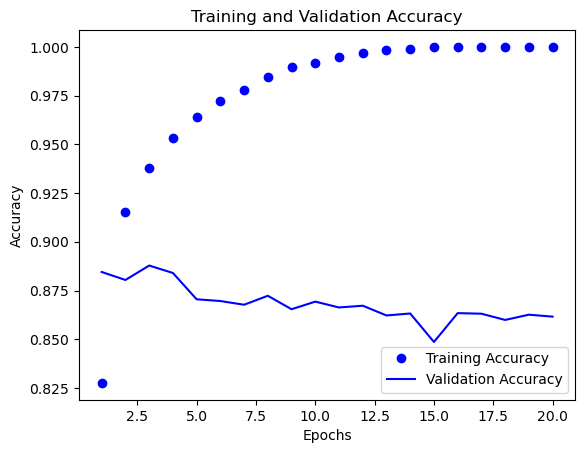

In [13]:
import matplotlib.pyplot as plt
epochs = range(1,len(history_dict['accuracy'])+1)
plt.plot(epochs,history_dict['accuracy'],"bo",label="Training Accuracy") # "bo" for dotted line
plt.plot(epochs,history_dict['val_accuracy'],"b",label="Validation Accuracy") # "b" for normal line
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

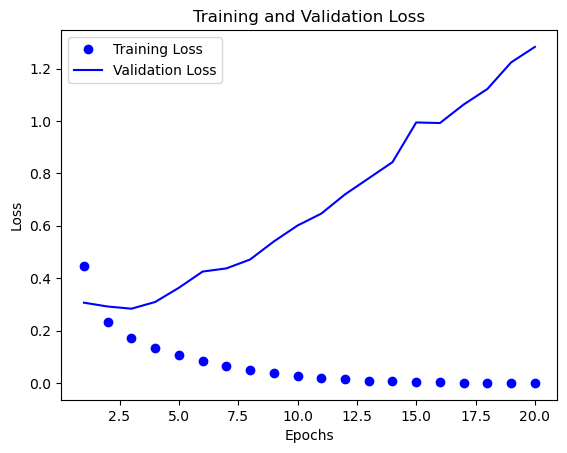

In [14]:
epochs = range(1,len(history_dict['loss'])+1)
plt.plot(epochs,history_dict['loss'],"bo",label="Training Loss") # "bo" for dotted line
plt.plot(epochs,history_dict['val_loss'],"b",label="Validation Loss") # "b" for normal line
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
# Validation loss is increasing after epoch 4, this means its overfitting, so we need to adjust the epochs to 4

# Similar to previous model
model1 = Sequential([
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=1,activation="sigmoid")
])

In [16]:
model1.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [17]:
history1 = model1.fit(partial_X_train,partial_y_train,epochs=4,batch_size=128,validation_data=(X_val,y_val))
history1

Epoch 1/4
118/118 [==============================] - 1s 7ms/step - loss: 0.4271 - accuracy: 0.8317 - val_loss: 0.3374 - val_accuracy: 0.8657
Epoch 2/4
118/118 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9159 - val_loss: 0.3800 - val_accuracy: 0.8449
Epoch 3/4
118/118 [==============================] - 1s 4ms/step - loss: 0.1659 - accuracy: 0.9416 - val_loss: 0.3359 - val_accuracy: 0.8665
Epoch 4/4
118/118 [==============================] - 1s 4ms/step - loss: 0.1258 - accuracy: 0.9555 - val_loss: 0.4601 - val_accuracy: 0.8503


In [19]:
results = model1.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.8422


In [20]:
# 84 percent accuracy on test data

In [21]:
predictions_on_new_data = model1.predict(X_test)

782/782 [==============================] - 1s 875us/step


In [22]:
predictions_on_new_data

array([[0.28218856],
       [0.9999997 ],
       [0.9993874 ],
       ...,
       [0.10526617],
       [0.32852495],
       [0.8956639 ]], dtype=float32)